# Adam Optimizer from Scratch

Adam is algorithm the optimizes stochastic objective functions based on adaptive estimates of moments. The update rule of Adam is a combination of momentum and the RMSProp optimizer.

## Working of Adam

Two values that Adam depend on are β₁ and β₂ . 
* β₁ is the exponential decay of the rate for the first moment estimates, and its literature value is 0.9. 

* β₂ is the exponential decay rate for the second-moment estimates, and its literature value is 0.999. Both literature values work well with most datasets.

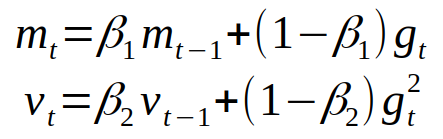

On a given iteration t, we can calculate the moving averages based on parameters β₁, β₂, and gradient gt. 

Since most algorithms that depend on moving averages such as SGD and RMSProp are biased, we need an extra step to correct the bias. 

This is known as the bias correction step:

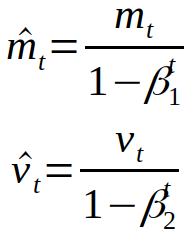

Finally, we can update the parameters (weights and biases) based on the calculated moving averages with a step size η:

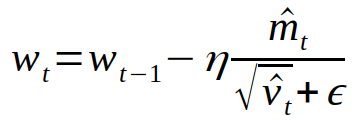

## Implementation

We need to define several variables: 1st-order exponential decay β₁, 2nd-order exponential decay β₂, step size η and a small value ε to prevent zero-division. Additionally, we define m_dw , v_dw , m_db and v_db as the mean and uncentered variance from the previous time step of the gradients of weights and biases dw and db.

In [1]:
import numpy as np
class AdamOptim():
    def __init__(self, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw, self.v_dw = 0, 0
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
    def update(self, t, w, b, dw, db):
        ## dw, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db

        ## rms beta 2
        # *** weights *** #
        self.v_dw = self.beta2*self.v_dw + (1-self.beta2)*(dw**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)

        ## update weights and biases
        w = w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        return w, b

## Testing the Implementation

To test our implementation, we will first need to define a loss function and its respective gradient function. 

A gradient function can be obtained by simply taking the derivative of the loss function.

In [2]:
def loss_function(m):
    return m**2-2*m+1
## take derivative
def grad_function(m):
    return 2*m-2
def check_convergence(w0, w1):
    return (w0 == w1)

We  will also define an additional function to check the convergence based on the fact that weights will not change when convergence is reached. 

Finally, we can iteratively update the weights and biases using our constructed Adam optimizer and see if they converge:



In [3]:
w_0 = 0
b_0 = 0
adam = AdamOptim()
t = 1 
converged = False

while not converged:
    dw = grad_function(w_0)
    db = grad_function(b_0)
    w_0_old = w_0
    w_0, b_0 = adam.update(t,w=w_0, b=b_0, dw=dw, db=db)
    if check_convergence(w_0, w_0_old):
        print('converged after '+str(t)+' iterations')
        break
    else:
        print('iteration '+str(t)+': weight='+str(w_0))
        t+=1

iteration 1: weight=0.009999999950000001
iteration 2: weight=0.01999725400385255
iteration 3: weight=0.029989900621600046
iteration 4: weight=0.039976060276935343
iteration 5: weight=0.049953839711732076
iteration 6: weight=0.05992133621693422
iteration 7: weight=0.06987664190678831
iteration 8: weight=0.07981784795404925
iteration 9: weight=0.08974304875491491
iteration 10: weight=0.0996503459940126
iteration 11: weight=0.10953785258172263
iteration 12: weight=0.11940369643843479
iteration 13: weight=0.12924602410293135
iteration 14: weight=0.13906300414491304
iteration 15: weight=0.14885283036466956
iteration 16: weight=0.15861372476597732
iteration 17: weight=0.1683439402914239
iteration 18: weight=0.17804176331244895
iteration 19: weight=0.1877055158694015
iteration 20: weight=0.19733355765979776
iteration 21: weight=0.2069242877756729
iteration 22: weight=0.21647614619342795
iteration 23: weight=0.22598761502184558
iteration 24: weight=0.23545721951596985
iteration 25: weight=0.24

/var/folders/dq/8rpvsfrx7pv2z_fs5jrd0mtm0000gn/T/ipykernel_78614/1097381739.py:32: RuntimeWarning: invalid value encountered in sqrt
  b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))


Convergence is reached under 750 iterations